## Exercice 3 Partie 1 :Classification des données de CIFAR-10 avec TensorFlow & Keras


### 1- Chargement des données

In [1]:
#Importation des bibliothèques
import random
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf
 
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow import keras 
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)

plt.rcParams['axes.titlesize'] = 16 
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['image.cmap'] = 'gray'

In [2]:
random.seed(22)
np.random.seed(22)
tf.random.set_seed(22)

### Nature du dataset
L'ensemble de données CIFAR-10 (Institut canadien de recherches avancées) est une collection d'images couramment utilisées pour entraîner des algorithmes d'apprentissage automatique et de vision par ordinateur. Il s'agit de l'un des ensembles de données les plus utilisés pour la recherche sur l'apprentissage automatique. L'ensemble de données CIFAR-10 contient 60 000 images couleur 32 x 32 réparties en 10 classes différentes. Les 10 classes différentes représentent les avions, les voitures, les oiseaux, les chats, les cerfs, les chiens, les grenouilles, les chevaux, les navires et les camions. Il y a 6 000 images de chaque classe.

In [3]:
Cifar10=keras.datasets.cifar10 #Chargement des données

(xtrain,ytrain),(xtest,ytest)= Cifar10.load_data()

# Oberservations de la taille du dataset
print("Train Images Shape: %s \nTrain Labels: %s \nTest Images Shape: %s \nTest Labels: %s \nYtrain shape: %s"  % (xtrain.shape, xtrain,xtest.shape,ytest, ytrain.shape))

Train Images Shape: (50000, 32, 32, 3) 
Train Labels: [[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112

In [4]:
list = range(0,50000)
nombres_aleatoires = [random.randint(0,50000) for _ in range(25000)]
nombres_restant = [nombre for nombre in list if nombre not in nombres_aleatoires]
X_valid = xtrain[nombres_aleatoires]
X_train = xtrain[nombres_restant]

Y_valid = ytrain[nombres_aleatoires]
Y_train = ytrain[nombres_restant]

In [5]:
print(X_train.shape)
print(X_valid.shape)
print(Y_train.shape)
print(Y_valid.shape)

(30358, 32, 32, 3)
(25000, 32, 32, 3)
(30358, 1)
(25000, 1)


### Observations
Il y a 60 000 images. Nous en avons affecté 10 000 pour les données test <br>
Les images sont en noir et blanc et mesurent 32 x 32 pixels <br>
Images d'entrainement : Tableau de 50 000 images de 32 X 32 pixels <br> donc on a affecté 25 000 pour les images de validations et 25 000 pour les images d'entrainement
Étiquettes de train : tableau d'entiers de 60 000 étiquettes, valeur comprise entre 0 et 9 <br>
Images de test : Tableau de 10 000 images en 32 X 32 pixels <br>
Étiquettes de test : tableau d'entiers de 10 000 étiquettes, valeur comprise entre 0 et 9 <br>


In [6]:
#on défint chaque étiquette pour chaque classe

class_names =['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print(class_names)

['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


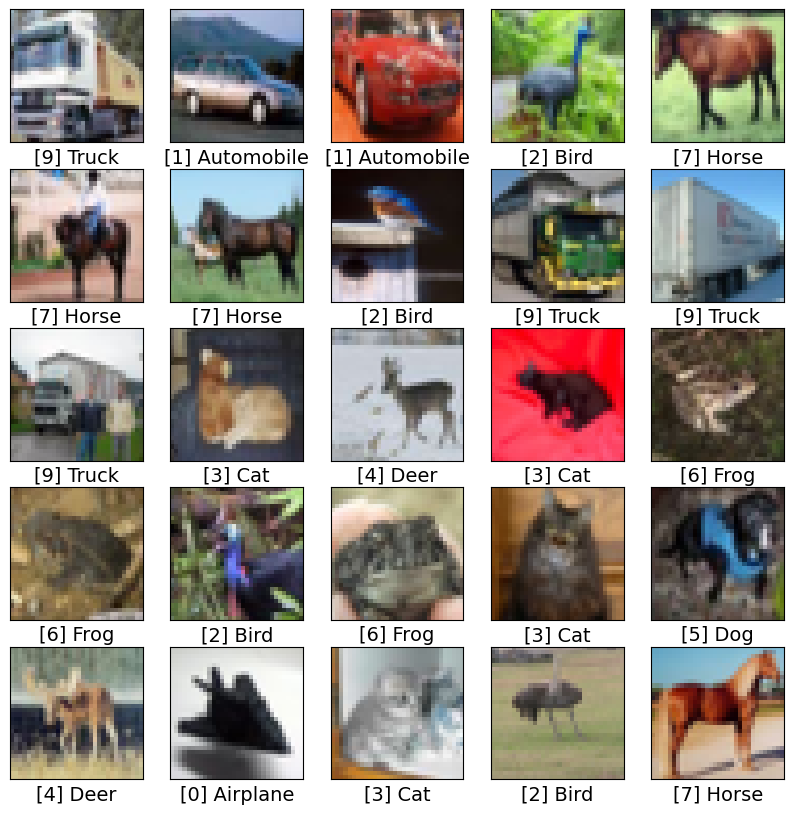

In [7]:
#Affichons les 25 premières images du dataset

plt.figure(figsize=(10,10))
for i in range(25): # 25 images
  plt.subplot(5,5,i+1) 
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap='gray') 
    
  plt.xlabel("%s %s" % (Y_train[i], class_names[Y_train[i][0]])) #Assign chaque étiquette aux images
plt.show()

## 2- Prétraitement des données

In [8]:
X_train = X_train.reshape((X_train.shape[0], 32, 32, 3))
X_test = xtest.reshape((xtest.shape[0], 32, 32, 3))
X_valid = X_valid.reshape((X_valid.shape[0], 32, 32, 3))

X_train = X_train.astype("float32") / 255
X_test = xtest.astype("float32") / 255
X_valid = X_valid.astype("float32") / 255

In [9]:
print(X_train.shape)

(30358, 32, 32, 3)


### Encodage one hot
Il s'agit d'un problème de classification en 10 classes, donc après l'encodage one hot, il générera 10 colonnes, soit 10 neurons de sortie pour chaque étiquette.

In [10]:
Y_train = to_categorical(Y_train)
Y_valid = to_categorical(Y_valid)
Y_test  = to_categorical(ytest)

# Après l'encodage one hot
print("Y_train Shape: %s and value: %s" % (Y_train.shape, Y_train[0]))
print("Y_valid Shape: %s and value: %s" % (Y_valid.shape, Y_valid[0]))
print("Y_test Shape: %s and value: %s" % (Y_test.shape, Y_test[1]))

Y_train Shape: (30358, 10) and value: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Y_valid Shape: (25000, 10) and value: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Y_test Shape: (10000, 10) and value: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


## 3- Compilation du modèle
Pour notre modèle nous allons utiliser un réseau de neuronne a 03 couches denses comportant respectivement 128, 128 et 10 neuronnes pour la sortie.<br>
Par la suite le modèle est compilé avec l'optimiseur RMSprop (Root Mean Square propagation), la fonction de perte "categorical_crossentropy" (car il s'agit d'un problème de classification multiclasse) et la métrique d'exactitude pour évaluer les performances du modèle pendant l'entraînement.



In [12]:
# Intanciation du modèle.
model = tf.keras.Sequential()
 
# construction du modèle.
model.add(layers.Flatten(input_shape=(32,32,3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10,  activation="softmax"))
 
# La méthode summary() est appelée pour afficher un résumé de l'architecture du modèle, y compris le nombre de paramètres dans chaque couche.
model.summary()

C:\Users\DELL E5580\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,146 (1.57 MB)

 Trainable params: 411,146 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## 4- Entrainement du modèle

In [20]:
training_results = model.fit(X_train, 
                             Y_train, 
                             epochs=40, 
                             batch_size=56, 
                             validation_data=(X_valid, Y_valid));

Epoch 1/40
543/543 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.5316 - loss: 1.3069 - val_accuracy: 0.4529 - val_loss: 1.5810
Epoch 2/40
543/543 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5286 - loss: 1.3137 - val_accuracy: 0.4577 - val_loss: 1.5717
Epoch 3/40
543/543 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5340 - loss: 1.3014 - val_accuracy: 0.4580 - val_loss: 1.5743
Epoch 4/40
543/543 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5385 - loss: 1.2880 - val_accuracy: 0.4564 - val_loss: 1.5807
Epoch 5/40
543/543 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5401 - loss: 1.2828 - val_accuracy: 0.4525 - val_loss: 1.6023
Epoch 6/40
543/543 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5397 - loss: 1.2815 - val_accuracy: 0.4520 - val_loss: 1.6054
Epoch 7/40
543/543 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5441 - loss: 1.2749 - val_accuracy: 0.4556 - val_loss: 1.5931
Epoch 8/40
543/543 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5479 - loss: 1.2652 - val_accur

## 6- Interprétation des resultats de l'entrainement


In [15]:
#Evaluons la précision du modèle

test_loss, test_acc = model.evaluate(X_test, Y_test)
print("accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4665 - loss: 1.5221
accuracy: 0.4672999978065491


### Observation
il y a peu d'ecart entre la précision du train et celle de test, c'est-à-dire 0,5820 et 0,4672, ce qui signifie que les métriques choisis pour le modèle sont parfaits (pas de sur entrainement ni de sous entrainement).<br> 
Mais d'autre part le modèle construit n'est pas précis (Précision :46%) du au choix de l'architecture. Dans notre cas nous avons obtez pour un modèle sequentiel

## 7- Prediction et conclusion

In [16]:
predictions = model.predict(X_test)
#Prédiction du 1er résultat. Il affichera les 10 prédictions d'étiquettes pour l'image de test
print("1. tableau de prediction: %s" % (predictions[0]))

# nous vérifierons quel résultat pour l'étiquette a la plus grande confiance
print("2. Numéro de l'étiquette ayant le plus grand pourcentage de prédiction: %s" % (np.argmax(predictions[0])))

print("3. Etiquette actuel du jeu de données: %s" % (Y_test[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1. Prediction array: [1.6124982e-02 1.5997151e-02 7.5216964e-03 7.5437510e-01 1.3107148e-02
 9.1239728e-02 5.8090361e-04 1.4335612e-03 8.0714785e-02 1.8904965e-02]
2. Label number having highest confidence in prediction array: 3
3. Actual label in dataset: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


### Observation:

Cela signifie que le modèle montre le plus de confiance à propos de la 1ère image_test : « Bottine » (« T-shirt/haut », « Pantalon », « Pull », « Robe », « Manteau », « Sandale », « Chemise », « Baskets », « Sac », « Bottine »)<br>
test_labels[0] donne également un résultat de 9 (c'est-à-dire « Bottine »). La prédiction est donc correcte. Les données sont codées à chaud donc il y en a 1 au dernier

In [17]:
# # création d'une fonction qui aidera à vérifier que la prédiction est vraie ou non

def plot_image(i, predictions_array, true_label, img): 
  
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)
  # print(predicted_label)
  # print(true_label)
  
  if predicted_label == true_label: #Configuration de la couleur de l'étiquette
    color='blue' # ce qui est correct est en bleu
    
  else:
    color='red' # ce qui est faux est en rouge

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)

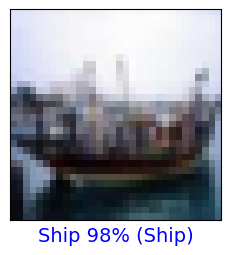

In [22]:
#Appel de la fonction
i=18 # On peut changer valeur de i pour une autre image
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i, predictions, Y_test, X_test)
plt.show()

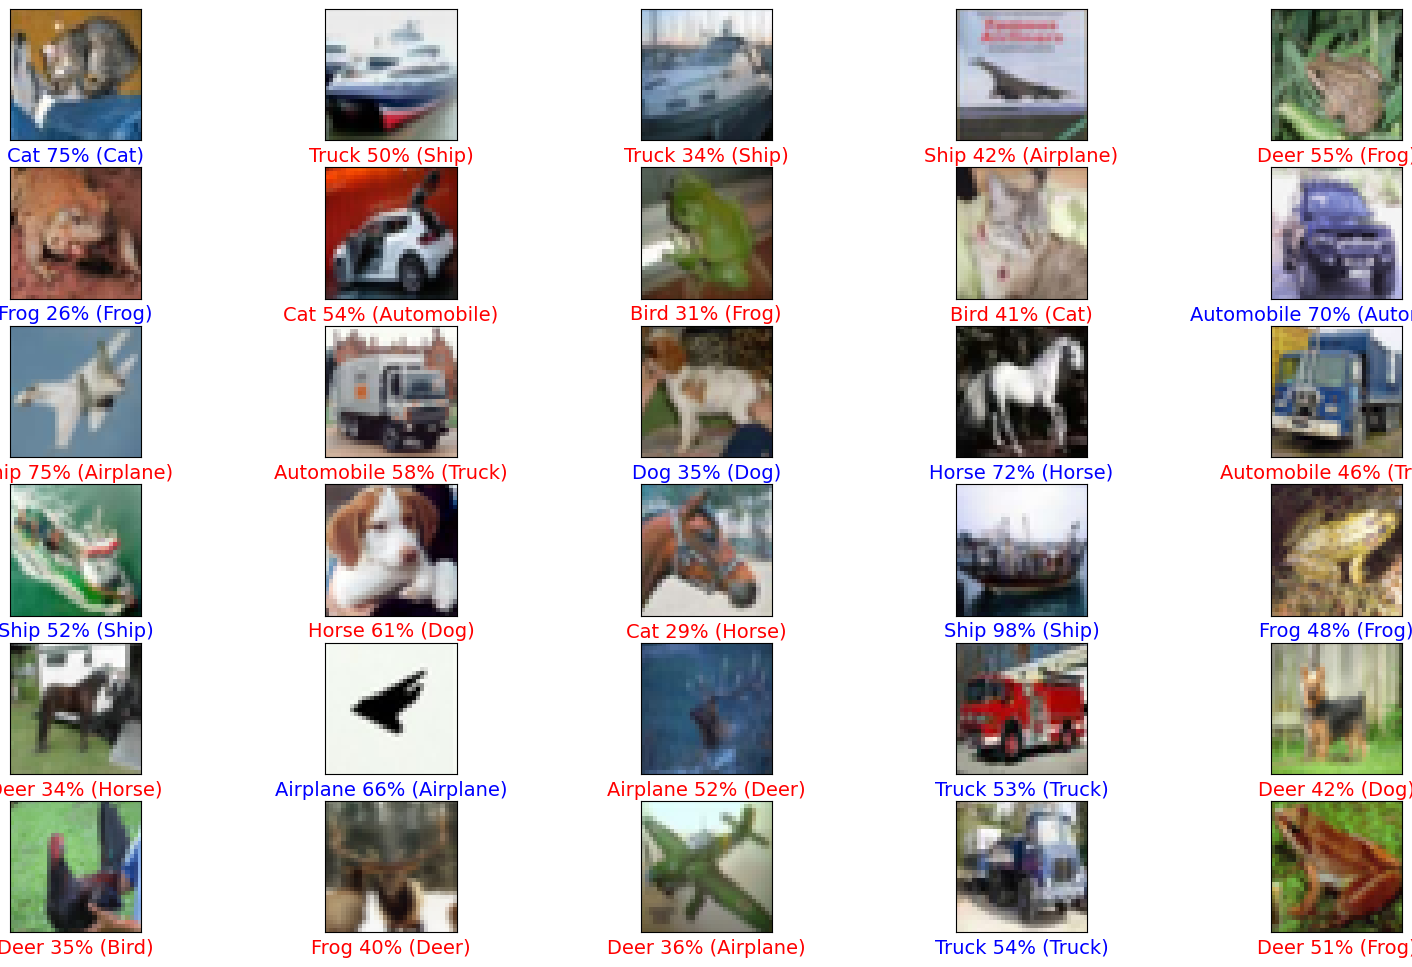

In [23]:
num_rows=6
num_cols=5
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, Y_test, X_test)
plt.show()

### Conclusion
Avec un modèle séquentiel avec plusieurs couches de neuronnes (03) et 40 époques pour l'entrainement, nous avons obtenu une précision de 46% pour la prédiction des tests.<br>
Après avoir étudié la précision et la perte de validation, nous avons compris que le modèle a été bien entrainer (pas de sur entrainement ni de sous entrainement).
l'utilisation d'un modèle séquentiel pour classifier les images avec couleurs n'est pas l'idéal. Nous devons utiliser les réseaux de neuronnes convulitifs